In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import csv
import os
import re
import pickle
import geopy
from geopy.geocoders import Nominatim

In [1]:
def pickled(obj,dest):
    """
    pickles obj to dest
    """
    
    out = open(dest,'wb')
    pickle.dump(obj,out)
    out.close()
    
def unpickle(file):
    """
    creates obj from pickle file
    """
    infile = open(file,'rb')
    obj = pickle.load(infile)
    infile.close()
    return obj

def propnan(df):
    return df.count()/len(df)

In [5]:
geopy

<module 'geopy' from '/usr/local/lib/python3.7/site-packages/geopy/__init__.py'>

In [11]:
infile = open('./Weather/all_rp5','rb')
rp5 = pickle.load(infile)

In [57]:
def add_space(s):
    return ''.join([' '+c if ((c.isupper() and i > 0) or c is '(') else c for i,c in enumerate(s)])

In [72]:
def cote_d(s):
    return s[:s.index(',')+1]+" Cote d'Ivoire"

In [74]:
cote_d(';;as,ld, lskmva')

";;as, Cote d'Ivoire"

In [60]:
#regions = rp5.groupby('region').first()[['country']].reset_index()

locnames = pd.DataFrame({'name':regions['region']+', '+regions['country']})
locnames['name'] = locnames['name'].apply(add_space)
locnames

,name
0,"Abankor, Algeria"
1,"Abeche, Chad"
2,"Abetifi, Ghana"
3,"Abha (airport), Saudi Arabia"
4,"Abidjan (airport), Coted' Ivoire"
5,"Abu Rudeis (airport), Egypt"
6,"Abu Simbel (airport), Egypt"
7,"Abuja (airport), Nigeria"
8,"Accra (airport), Ghana"
9,"Ada, Ghana"


In [59]:
add_space(teststr2)

'Abc (d E'

In [8]:
from tqdm import tqdm
tqdm.pandas()

In [7]:
def multigeocode(s,geocode):
    gs1 = geocode(s)
    if gs1 is not None:
        return gs1
    else:
        # remove '(airport)'
        s2 = re.sub('\(.+\)','',s)
        gs2 = geocode(s2)
        if gs2 is not None:
            return gs2
        else:
            # remove anything between '.' and ','
            s3 = re.sub('\..+,',',',s)
            gs3 = geocode(s3)
            if gs3 is not None:
                return gs3
            else:
                # remove anything before '.'
                s4 = re.sub('.+\.','',s)
                gs4 = geocode(s4)
                return gs4  

In [133]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
geolocator = Nominatim(user_agent="specify_your_app_name_here")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
locnames['location'] = locnames['name'].progress_apply(multigeocode,args=(geocode,))
locnames['point'] = locnames['location'].apply(lambda loc: tuple(loc.point) if loc else None)

  3%|▎         | 13/471 [00:31<16:47,  2.20s/it]RateLimiter caught an error, retrying (0/2 tries). Called with (*('Agadez (airport),  Niger',), **{}).
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.7.1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/usr/local/Cellar/python/3.7.1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/http/client.py", line 1229, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/usr/local/Cellar/python/3.7.1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/http/client.py", line 1275, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/usr/local/Cellar/python/3.7.1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/http/client.py", line 1224, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/usr/local/Cell

In [127]:
re.sub('.+\.','','12345.abcdefg , hijk')

'abcdefg , hijk'

In [138]:
locnames[locnames['location'].isna()]

,name,location,point
0,"Abankor, Algeria",None,None
4,"Abidjan (airport), Coted' Ivoire",None,None
21,"Akuse, Ghana",None,None
71,"Bordjel Haoues, Algeria",None,None
77,"Bouake, Coted' Ivoire",None,None
109,"Dindiza, Mozambique",None,None
118,"Dzaoudzi. Pamanzi (airport), Comoros",None,None
137,"Fadnoune, Algeria",None,None
156,"Glorioso Islands, Reunion",None,None
170,"Hassi R' Mel, Algeria",None,None


In [147]:
locnames['latitude'] = locnames['point'].apply(lambda x: x[0] if x is not None else None)

In [149]:
locnames['longitude'] = locnames['point'].apply(lambda x: x[1] if x is not None else None)

In [151]:
locnames.count()

name         471
location     444
point        444
latitude     444
longitude    444
dtype: int64

In [157]:
difficult = locnames[locnames['point'].isna()]
difficult

,name,location,point,latitude,longitude
0,"Abankor, Algeria",None,None,NaN,NaN
4,"Abidjan (airport), Coted' Ivoire",None,None,NaN,NaN
21,"Akuse, Ghana",None,None,NaN,NaN
71,"Bordjel Haoues, Algeria",None,None,NaN,NaN
77,"Bouake, Coted' Ivoire",None,None,NaN,NaN
109,"Dindiza, Mozambique",None,None,NaN,NaN
118,"Dzaoudzi. Pamanzi (airport), Comoros",None,None,NaN,NaN
137,"Fadnoune, Algeria",None,None,NaN,NaN
156,"Glorioso Islands, Reunion",None,None,NaN,NaN
170,"Hassi R' Mel, Algeria",None,None,NaN,NaN


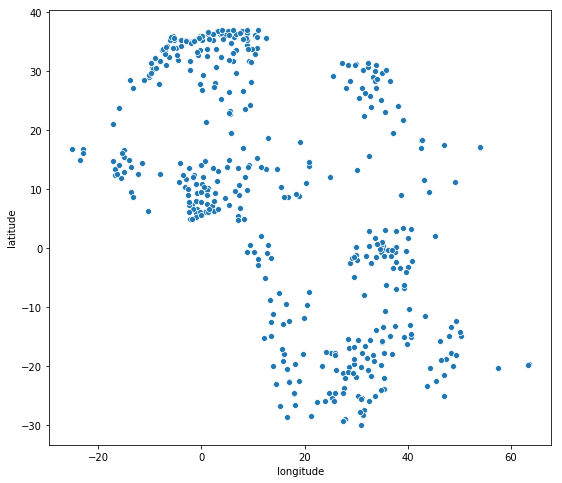

In [158]:
plt.figure(figsize=(9,8))
sns.scatterplot(x='longitude',y='latitude',data=locnames)

In [82]:
wp = locnames[locnames['name'].str.contains('.',regex=False)]

In [96]:
wp

,name
14,"Agadir. Al Massira (airport), Morocco"
33,"Antananarivo. Ivato (airport), Madagascar"
46,"Bamako. Senou (airport), Mali"
47,"Banjul. Yundum (airport), Gambia"
95,"Conakry. Gbessia (airport), Guinea"
104,"Dar El Beida. Houari Boumediene (airport), Al..."
111,"Djerba. Mellita (airport), Tunisia"
118,"Dzaoudzi. Pamanzi (airport), Comoros"
125,"El Oued. Guemar (airport), Algeria"
131,"Enugu. Akanu Ibiam (airport), Nigeria"


In [87]:
for n in wp['name']:
    print(n,'\n',geocode(n),'\n\n\n')

Agadir. Al Massira (airport),  Morocco 
 Aéroport Al Massira مطار المسيرة, P1714, Ikhourbane ⵉⵅⵓⵔⴱⴰⵏ إخوربان, Temsia ⵜⴻⵎⵙⵉⵢⴰ التمسية, caïdat de Temsia, cercle d'Aït Melloul, Préfecture d'Inezgane-Aït Melloul ⵍⵄⴰⵎⴰⵍⴰ ⵏ ⵉⵏⵣⴳⴰⵏ-ⴰⵢⵜ ⴺⵍⵓⵍ عمالة إنزكان آيت ملول, Souss-Massa ⵙⵓⵙⵙ-ⵎⴰⵙⵙⴰ سوس-ماسة, 86602, Maroc ⵍⵎⵖⵔⵉⴱ المغرب 



Antananarivo. Ivato (airport),  Madagascar 
 Aéroport International d'Ivato, N 52, Mandriambero, Andraondrikely, Analamanga, Province d’Antananarivo, 105, Madagasikara 



Bamako. Senou (airport),  Mali 
 Aéroport international Modibo Keïta, Route de l'Aéroport, Niamakoro, Bamako, Bamako - Koulikoro, 3001, Mali 



Banjul. Yundum (airport),  Gambia 
 Banjul International Airport, Airport Road, Yundum, Kombo North/Saint Mary, Brikama, West Coast, Gambia 



Conakry. Gbessia (airport),  Guinea 
 Parking SOGEAC (Aeoroport de Conakry-Gbessia ), Autoroute Fidel Castro, Cité de l'Air, Matoto, Conakry, BP 312, Guinée 



Dar El Beida. Houari Boumediene (airport),  Algeria 
 Non

KeyboardInterrupt: 

In [117]:
geocode('St. Catherine, Egypt')

Location(مدينة سانت كاترين, جنوب سيناء, مصر, (28.5675077, 33.9535607, 0.0))

In [ ]:
(35.75256235, 10.7786673101626, 0
(35.76590005, 10.7771314128719, 0
(35.7398399, 10.7986953383714, 0.0))

In [159]:
locnames

,name,location,point,latitude,longitude
0,"Abankor, Algeria",None,None,NaN,NaN
1,"Abeche, Chad","(Abéché أبشي, Ouaddaï وداي, Tchad تشاد, (13.82...","(13.8280295, 20.8283652, 0.0)",13.828029,20.828365
2,"Abetifi, Ghana","(Abetifi, Eastern Region, Ghana, (6.672433, -0...","(6.672433, -0.743845, 0.0)",6.672433,-0.743845
3,"Abha (airport), Saudi Arabia","(Abha International Airport, 10, حجلة, منطقة ع...","(18.2416611, 42.6537664497392, 0.0)",18.241661,42.653766
4,"Abidjan (airport), Coted' Ivoire",None,None,NaN,NaN
5,"Abu Rudeis (airport), Egypt","(مطار أبو رديس, طريق القاهرة شرم, أبو رديس, جن...","(28.9005888, 33.200534992717, 0.0)",28.900589,33.200535
6,"Abu Simbel (airport), Egypt","(Abu Simbel Airport, أبو سنبل, محافظة أسوان, م...","(22.37222945, 31.6130268996251, 0.0)",22.372229,31.613027
7,"Abuja (airport), Nigeria","(Airport, Abuja, Municipal Area Council, Feder...","(9.0067224, 7.2723697, 0.0)",9.006722,7.272370
8,"Accra (airport), Ghana","(Kotoka International Airport, La Tante DC 10,...","(5.6039335, -0.16804352307417, 0.0)",5.603934,-0.168044
9,"Ada, Ghana","(Ada, Ashanti Region, Ghana, (7.2450603, -1.85...","(7.2450603, -1.8520079, 0.0)",7.245060,-1.852008


In [160]:
output = open('coords.pkl', 'wb')
pickle.dump(locnames, output)
output.close()

In [5]:
coords = unpickle('./Weather/coords.pkl')
coords

,name,location,point,latitude,longitude
0,"Abankor, Algeria",None,None,NaN,NaN
1,"Abeche, Chad","(Abéché أبشي, Ouaddaï وداي, Tchad تشاد, (13.82...","(13.8280295, 20.8283652, 0.0)",13.828029,20.828365
2,"Abetifi, Ghana","(Abetifi, Eastern Region, Ghana, (6.672433, -0...","(6.672433, -0.743845, 0.0)",6.672433,-0.743845
3,"Abha (airport), Saudi Arabia","(Abha International Airport, 10, حجلة, منطقة ع...","(18.2416611, 42.6537664497392, 0.0)",18.241661,42.653766
4,"Abidjan (airport), Coted' Ivoire",None,None,NaN,NaN
5,"Abu Rudeis (airport), Egypt","(مطار أبو رديس, طريق القاهرة شرم, أبو رديس, جن...","(28.9005888, 33.200534992717, 0.0)",28.900589,33.200535
6,"Abu Simbel (airport), Egypt","(Abu Simbel Airport, أبو سنبل, محافظة أسوان, م...","(22.37222945, 31.6130268996251, 0.0)",22.372229,31.613027
7,"Abuja (airport), Nigeria","(Airport, Abuja, Municipal Area Council, Feder...","(9.0067224, 7.2723697, 0.0)",9.006722,7.272370
8,"Accra (airport), Ghana","(Kotoka International Airport, La Tante DC 10,...","(5.6039335, -0.16804352307417, 0.0)",5.603934,-0.168044
9,"Ada, Ghana","(Ada, Ashanti Region, Ghana, (7.2450603, -1.85...","(7.2450603, -1.8520079, 0.0)",7.245060,-1.852008


In [6]:
df = coords[coords['location'].isna()]
df

,name,location,point,latitude,longitude
0,"Abankor, Algeria",None,None,NaN,NaN
4,"Abidjan (airport), Coted' Ivoire",None,None,NaN,NaN
21,"Akuse, Ghana",None,None,NaN,NaN
71,"Bordjel Haoues, Algeria",None,None,NaN,NaN
77,"Bouake, Coted' Ivoire",None,None,NaN,NaN
109,"Dindiza, Mozambique",None,None,NaN,NaN
118,"Dzaoudzi. Pamanzi (airport), Comoros",None,None,NaN,NaN
137,"Fadnoune, Algeria",None,None,NaN,NaN
156,"Glorioso Islands, Reunion",None,None,NaN,NaN
170,"Hassi R' Mel, Algeria",None,None,NaN,NaN


In [52]:
def multigeocode2(s,geocode):
    
    gs1 = geocode(s)
    if gs1 is not None:
        return gs1
    else:
        if 'Coted' in s:
            s1 = s.replace("Coted '", "Cote d'")
            gsc = geocode(1)
            if gsc is not None:
                return gsc
        else:
            # remove '(airport)'
            s2 = re.sub('\(.+\)','',s)
            print(s2)
            gs2 = geocode(s2)
            if gs2 is not None:
                return gs2
            else:
                # remove anything between '.' and ','
                s3 = re.sub('\..+,',',',s)
                print(s3)
                gs3 = geocode(s3)
                if gs3 is not None:
                    return gs3
                else:
                    # remove anything before '.'
                    s4 = re.sub('.+\.','',s)
                    print(s4)
                    gs4 = geocode(s4)
                    return gs4


In [53]:
dfshort = df.head(10)

In [15]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
geolocator = Nominatim(user_agent="specify_your_app_name_here")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
dfshort['location'] = dfshort['name'].progress_apply(multigeocode2,args=(geocode,))
dfshort['point'] = dfshort['location'].apply(lambda loc: tuple(loc.point) if loc else None)

  0%|          | 0/10 [00:00<?, ?it/s]

Abankor,  Algeria
Abankor,  Algeria
Abankor,  Algeria


 20%|██        | 2/10 [00:05<00:22,  2.86s/it]

Abidjan ,  Coted' Ivoire
Abidjan (airport),  Coted' Ivoire
Abidjan (airport),  Coted' Ivoire


 30%|███       | 3/10 [00:12<00:27,  3.97s/it]

Akuse,  Ghana
Akuse,  Ghana
Akuse,  Ghana


 40%|████      | 4/10 [00:18<00:28,  4.76s/it]

Bordjel Haoues,  Algeria
Bordjel Haoues,  Algeria
Bordjel Haoues,  Algeria


 50%|█████     | 5/10 [00:25<00:26,  5.31s/it]

Bouake,  Coted' Ivoire
Bouake,  Coted' Ivoire
Bouake,  Coted' Ivoire


 60%|██████    | 6/10 [00:32<00:22,  5.68s/it]

Dindiza,  Mozambique
Dindiza,  Mozambique
Dindiza,  Mozambique


 70%|███████   | 7/10 [00:38<00:17,  5.94s/it]

Dzaoudzi. Pamanzi ,  Comoros
Dzaoudzi,  Comoros
 Pamanzi (airport),  Comoros


 80%|████████  | 8/10 [00:45<00:12,  6.15s/it]

Fadnoune,  Algeria
Fadnoune,  Algeria
Fadnoune,  Algeria


 90%|█████████ | 9/10 [00:51<00:06,  6.28s/it]

Glorioso Islands,  Reunion
Glorioso Islands,  Reunion
Glorioso Islands,  Reunion


100%|██████████| 10/10 [00:58<00:00,  6.39s/it]

Hassi R' Mel,  Algeria
Hassi R' Mel,  Algeria
Hassi R' Mel,  Algeria



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Manually checking locations

In [62]:
df

,name,location,point,latitude,longitude
0,"Abankor, Algeria",None,None,NaN,NaN
4,"Abidjan (airport), Coted' Ivoire",None,None,NaN,NaN
21,"Akuse, Ghana",None,None,NaN,NaN
71,"Bordjel Haoues, Algeria",None,None,NaN,NaN
77,"Bouake, Coted' Ivoire",None,None,NaN,NaN
109,"Dindiza, Mozambique",None,None,NaN,NaN
118,"Dzaoudzi. Pamanzi (airport), Comoros",None,None,NaN,NaN
137,"Fadnoune, Algeria",None,None,NaN,NaN
156,"Glorioso Islands, Reunion",None,None,NaN,NaN
170,"Hassi R' Mel, Algeria",None,None,NaN,NaN


In [60]:
abidjan = geocode("Abidjan (airport), Cote d'Ivoire").point[:2]
abidjan

(5.2589521, -3.93640701173578)

In [61]:
akuse = (6.1006737,0.1224941)

In [64]:
bhalg = (24.8837406,8.4169005)

In [63]:
abankor = (24.9249574,2.3421561)

# Notes

Abankor- manual

Akuse- manual

Abidjan (airport), Cote d'Ivoire- respace "Coted --> Cote d"

Bordjel Haoues, Algeria- "Bordj El Haoues, Algeria"

